In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
import pandas as pd

In [31]:
df = pd.read_csv("quiz3_grades_without_names.csv")
df.head()

,Grade/10.00,Q. 1 /1.00,Q. 2 /1.00,Q. 3 /1.00,Q. 4 /1.00,Q. 5 /1.00,Q. 6 /1.00,Q. 7 /1.00,Q. 8 /1.00,Q. 9 /1.00,Q. 10 /1.00
0,8.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
1,8.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0
2,10.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,6.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
4,9.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [32]:
df.shape

(40, 11)

In [33]:
# last row is average
avg = df.iloc[39,:]
df.drop(39, axis=0, inplace=True)

In [34]:
avg

Grade/10.00    7.65
Q. 1 /1.00     0.92
Q. 2 /1.00     0.79
Q. 3 /1.00     0.90
Q. 4 /1.00     0.74
Q. 5 /1.00     0.72
Q. 6 /1.00     0.79
Q. 7 /1.00     0.56
Q. 8 /1.00     0.95
Q. 9 /1.00     0.69
Q. 10 /1.00    0.56
Name: 39, dtype: float64

Text(0.5, 0, 'question')

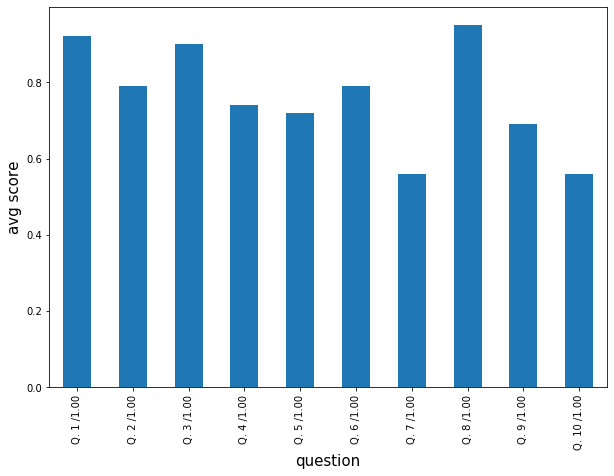

In [41]:
avg.drop("Grade/10.00").plot(kind = 'bar', figsize=(10, 7))
plt.ylabel("avg score", fontsize=15)
plt.xlabel("question", fontsize=15)

In [45]:
grades = pd.DataFrame(df["Grade/10.00"])

In [46]:
losses = []
for k in range(1, 11):
    est = KMeans(n_clusters=k)
    est.fit(grades)
    losses.append(est.inertia_)

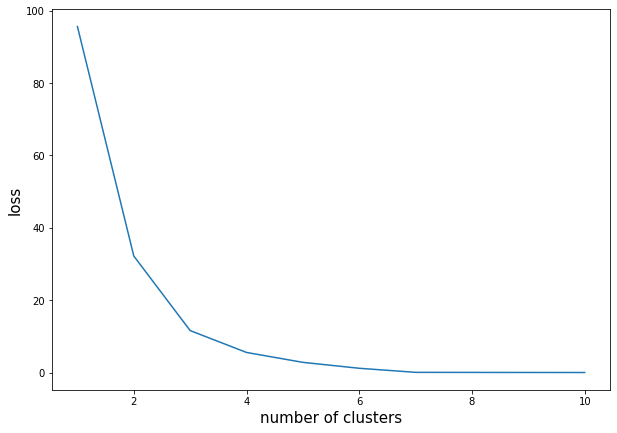

In [47]:
plt.figure(figsize=(10,7))
plt.plot(range(1,11), losses)
plt.ylabel("loss", fontsize=15)
plt.xlabel("number of clusters", fontsize=15);

Seems that 5 or 6 clusters should be enough.

In [49]:
# cluster centers for 5 clusters
est = KMeans(n_clusters=5)
est.fit(grades)
print(sorted(est.cluster_centers_))

[array([4.58]), array([6.76]), array([7.98333333]), array([8.9875]), array([10.])]
